In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Possible CNN activities
1. structure --> function mapping, monitor progression without VF testing
   - Approach: use all retinal images, with goal to:
   - predict 60 features (IOP and VF values, independent of spatial information)
   - what would be the goal here?
       - prediction of current glaucoma severity
       - not every location has a VF device; could take retinal image and predict VF (i.e., predict functional state)
   - alternatively, could pair retinal scan images with interpolated VF datasets, to accomplish the same goal
     
2. Longitudinal prediction
    - this would entail "image embedding" from CNN
    - then add clinical data
    - then LSTM?
    - output would be prediction of future VF and IOP?
    - output risk score and/or risk category?


3. Diagnosis of TYPE of glaucoma from retinal image, and any association with VF?

- CNN for images + baseline clinical features encoded separately
- Multi-output regression for VF + IOP
- Longitudinal prediction? 
- some kind of progression risk/score as output?


In [5]:
os.chdir("ROI images")

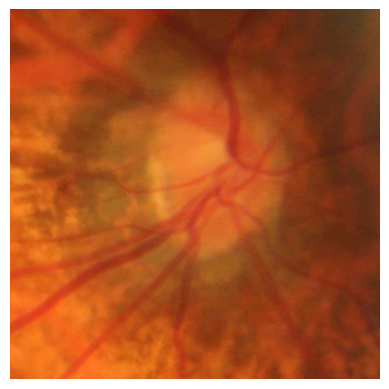

(453, 453, 3)


In [6]:
import matplotlib.image as mpimg

img_path = "1_OD_1.jpg"

img = mpimg.imread(img_path)

plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()
print(img.shape)

In [7]:
os.chdir("../CFPs")

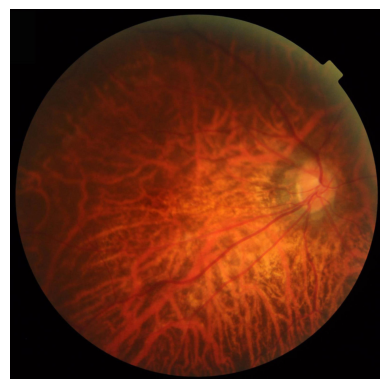

(1556, 1556, 3)


In [8]:
import matplotlib.image as mpimg

img_path = "1_OD_1.jpg"

img = mpimg.imread(img_path)

#plt.title(f"{disaster}, image {idx}, label {label}")
plt.imshow(img.astype(np.uint8))
plt.axis("off")
plt.show()
print(img.shape)
#
#print(f"image shape: {img.shape}")

In [72]:
# get associated data for each subject
GRAPE_df = pd.read_excel("../GRAPE_Glaucoma_Dataset/VF and clinical information.xlsx", header=0)
GRAPE_followup_df = pd.read_csv("../UW_and_GRAPE_data/GRAPE_FollowUps.csv", header=0)

In [73]:
GRAPE_df

,Subject Number,Laterality,Age,Gender,IOP,CCT,Total Visits,PLR2,PLR3,MD,...,51,52,53,54,55,56,57,58,59,60
0,1,OD,46,F,14.7,535,3,0,0,0,...,20,22,21,23,26,14,13,19,20,21
1,1,OS,46,F,15.3,525,4,0,0,0,...,21,22,21,21,21,23,25,22,25,22
2,2,OS,57,M,15.5,545,3,0,0,0,...,17,20,24,13,-1,-1,-1,-1,-1,23
3,3,OD,41,M,17.0,557,7,1,0,1,...,27,25,16,21,22,23,23,22,26,30
4,4,OS,58,M,14.7,487,4,0,0,0,...,21,22,22,16,24,23,22,12,14,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,142,OS,34,F,20.7,516,6,0,0,0,...,27,24,23,3,3,-1,14,28,27,25
259,143,OD,51,F,9.0,479,4,0,0,0,...,27,27,27,28,27,28,27,26,26,26
260,143,OS,51,F,8.0,477,4,1,0,0,...,21,24,28,28,27,26,24,25,25,22
261,144,OD,21,M,20.0,556,3,0,0,0,...,29,26,24,24,27,26,24,16,23,27


In [ ]:
GRAPE_df.columns

In [76]:
GRAPE_followup_df.columns

Index(['Subject Number', 'Laterality', 'Visit Number', 'Interval Years', 'IOP',
       'Corresponding CFP', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59'],
      dtype='object')

In [139]:
GRAPE_followup_df

,Subject Number,Laterality,Visit Number,Interval Years,IOP,Corresponding CFP,0,1,2,3,...,50,51,52,53,54,55,56,57,58,59
0,1,OD,1,0.000000,14.7,1_OD_1.jpg,21,22,20,23,...,20,22,21,23,26,14,13,19,20,21
1,1,OD,2,0.838356,17.0,1_OD_2.jpg,31,28,28,29,...,20,22,17,22,16,12,14,21,21,18
2,1,OD,3,2.134247,16.5,1_OD_3.jpg,26,25,26,27,...,20,19,12,20,12,5,20,22,25,22
3,1,OS,1,0.000000,15.3,1_OS_1.jpg,24,26,23,26,...,21,22,21,21,21,23,25,22,25,22
4,1,OS,2,0.756164,16.5,1_OS_2.jpg,30,27,27,27,...,27,23,20,22,22,21,20,21,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,144,OD,2,0.991781,14.5,144_OD_2.jpg,32,31,30,32,...,27,26,23,24,28,28,28,26,22,26
1111,144,OD,3,1.568431,18.2,/,27,27,28,28,...,29,26,24,24,27,28,30,23,26,28
1112,144,OS,1,0.000000,18.0,144_OS_1.jpg,32,32,29,30,...,22,24,23,23,26,27,26,23,24,23
1113,144,OS,2,0.991781,11.5,144_OS_2.jpg,32,29,30,29,...,22,23,24,24,25,28,25,22,22,22


In [140]:
GRAPE_followup_df_images = GRAPE_followup_df[GRAPE_followup_df["Corresponding CFP"] != "/"].reset_index(drop=True)

In [141]:
GRAPE_followup_df_images[['Corresponding CFP','IOP', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
'10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
'22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
'34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
'46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
'58', '59']]

,Corresponding CFP,IOP,0,1,2,3,4,5,6,7,...,50,51,52,53,54,55,56,57,58,59
0,1_OD_1.jpg,14.7,21,22,20,23,24,25,14,25,...,20,22,21,23,26,14,13,19,20,21
1,1_OD_2.jpg,17.0,31,28,28,29,28,27,28,30,...,20,22,17,22,16,12,14,21,21,18
2,1_OD_3.jpg,16.5,26,25,26,27,26,25,22,28,...,20,19,12,20,12,5,20,22,25,22
3,1_OS_1.jpg,15.3,24,26,23,26,26,27,23,26,...,21,22,21,21,21,23,25,22,25,22
4,1_OS_2.jpg,16.5,30,27,27,27,27,26,27,27,...,27,23,20,22,22,21,20,21,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,143_OS_3.jpg,8.0,31,29,31,29,28,28,31,28,...,26,24,21,23,26,24,25,25,25,23
627,144_OD_1.jpg,20.0,31,31,30,31,30,29,30,31,...,29,26,24,24,27,26,24,16,23,27
628,144_OD_2.jpg,14.5,32,31,30,32,31,29,31,31,...,27,26,23,24,28,28,28,26,22,26
629,144_OS_1.jpg,18.0,32,32,29,30,31,29,28,29,...,22,24,23,23,26,27,26,23,24,23


In [131]:
GRAPE_followup_df_images.iloc[:, 27]

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
626   -1
627   -1
628   -1
629   -1
630   -1
Name: 21, Length: 631, dtype: int64

In [145]:
GRAPE_followup_df_images

,Subject Number,Laterality,Visit Number,Interval Years,IOP,Corresponding CFP,0,1,2,3,...,50,51,52,53,54,55,56,57,58,59
0,1,OD,1,0.000000,14.7,1_OD_1.jpg,21,22,20,23,...,20,22,21,23,26,14,13,19,20,21
1,1,OD,2,0.838356,17.0,1_OD_2.jpg,31,28,28,29,...,20,22,17,22,16,12,14,21,21,18
2,1,OD,3,2.134247,16.5,1_OD_3.jpg,26,25,26,27,...,20,19,12,20,12,5,20,22,25,22
3,1,OS,1,0.000000,15.3,1_OS_1.jpg,24,26,23,26,...,21,22,21,21,21,23,25,22,25,22
4,1,OS,2,0.756164,16.5,1_OS_2.jpg,30,27,27,27,...,27,23,20,22,22,21,20,21,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,143,OS,3,1.098630,8.0,143_OS_3.jpg,31,29,31,29,...,26,24,21,23,26,24,25,25,25,23
627,144,OD,1,0.000000,20.0,144_OD_1.jpg,31,31,30,31,...,29,26,24,24,27,26,24,16,23,27
628,144,OD,2,0.991781,14.5,144_OD_2.jpg,32,31,30,32,...,27,26,23,24,28,28,28,26,22,26
629,144,OS,1,0.000000,18.0,144_OS_1.jpg,32,32,29,30,...,22,24,23,23,26,27,26,23,24,23


### Pilot CNN + 60 targets

In [ ]:
# Overall CNN 2 (running)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np

# 1. Define CNN
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Convolutional layers: extract local spatial patterns
        # convolution layer 1: lines, edges, simpler textures
        self.conv1 = nn.Conv2d(3, 256, kernel_size=3)  # in_channels, out_channels, kernel size (3x3)
        self.pool1 = nn.MaxPool2d(2,2)  # max pooling layer; reduce spatial size of feature maps by 1/2: (kernel_size, stride)

        # convolution layer 2: more complex patterns
        self.conv2 = nn.Conv2d(256, 512, kernel_size=3)  # increase out_channels to 512 to accommodate more complex features
        self.pool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(512, 512, kernel_size=2)  # capture finer-grained detail in feature maps
        self.pool3 = nn.AdaptiveAvgPool2d((4,4))  # average pooling layer (take average instead of max value); apparently better for regression tasks

        self.flatten = nn.Flatten()  # convert 2D tensor to 1D tensor

        # Fully connected (dense) layers: learn relationships among features
        # Dense layer 1: 
        self.fc1 = nn.Linear(512*4*4, 1024)  # out_features, in_features: 1024 neurons are going to learn weighted combination of 512x4x4 features
        self.drop1 = nn.Dropout(p=0.5)  # set random 50% of neurons to 0 in each training iterations

        self.fc2 = nn.Linear(1024, 1024)
        self.drop2 = nn.Dropout(p=0.5)

        # Output layer: map learned features to 60 predictions
        self.out = nn.Linear(1024, 60)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = self.drop1(x)

        x = F.relu(self.fc2(x))
        x = self.drop2(x)

        x = self.out(x)
        
        return x

# 2. Image transformation function (with augmentation across training epochs)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])

def tensor_transform(image_path):
    img = Image.open(image_path).convert('RGB')
    return transform(img)

# 3. Prepare dataset
scaler_y = StandardScaler()

cols = ['IOP','0','1','2','3','4','5','6','7','8','9',
        '10','11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24','25','26','28','29','30','31','32','33',
        '34','35','36','37','38','39','40','41','42','43','44','45',
        '46','47','48','49','50','51','52','53','54','55','56','57',
        '58','59']

targets_scaled = scaler_y.fit_transform(GRAPE_followup_df_images[cols].values)  # scale target values

# prepare dataset: list of (img_tensor, feature_tensor) tuples
dataset = []
for index, row in GRAPE_followup_df_images.iterrows():
    img_tensor = tensor_transform(row["Corresponding CFP"])
    target_tensor = torch.from_numpy(targets_scaled[index]).float()
    dataset.append((img_tensor, target_tensor))

images = torch.stack([item[0] for item in dataset])
targets = torch.stack([item[1] for item in dataset])

full_dataset = TensorDataset(images, targets)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
trainset, valset = random_split(full_dataset, [train_size, val_size]) # [train_size, val_size] = how many samples go into each split

batch_size = 8
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)  # shuffle=True -> random image order during each training epoch
valloader = DataLoader(valset, batch_size=batch_size)

# 4. Training setup
net = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)
# reduce learning rate across epochs if loss stops improving
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)  

# 5. Training / validation functions
def train_one_epoch():
    net.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        labels = labels.float()
        optimizer.zero_grad()  # clear out gradients stored from previous batch iterations

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # weight by batch size (inputs.size(0))

    avg_loss = running_loss / len(trainloader.dataset)
    print(f"Train loss: {avg_loss}")
    return avg_loss

def validate_one_epoch():
    net.eval()
    running_loss = 0.0

    with torch.no_grad():  # validation doesn't need weight updates; inactivate gradient tracking and updating
        for inputs, labels in valloader:
            labels = labels.float()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

    avg_loss = running_loss / len(valloader.dataset)
    print(f"Validation loss: {avg_loss:.4f}")
    return avg_loss

# 6. Training loop with early stopping (this is from gpt)
num_epochs = 20
best_val_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss = train_one_epoch()
    val_loss = validate_one_epoch()

    scheduler.step(val_loss)  # adjust LR if plateau

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(net.state_dict(), "best_model.pt")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break


In [ ]:
# predictions on validation set
net.eval()
all_preds = []
all_trues = []

with torch.no_grad():
    for x, y in valloader:
        pred = net(x).cpu().numpy()
        all_preds.append(pred)
        all_trues.append(y.numpy())

all_preds = np.vstack(all_preds)
all_trues = np.vstack(all_trues)

### things to consider doing next with target predictions:  
- plot error loss over epochs
- plot subset of filter outputs for representative image (e.g., 16 filters)
- use actual mean, std of image set instead of stock mean, std

Evaluation:  
- plot correlation between predicted and ground truth for each target
- calculate RMSE for each target
- calculate mean RMSE across all targets


### Other notes/planning/reference code

In [68]:
# Separate images by visit?
import glob

dataset = {}
for image in glob.glob("*.jpg"):
    tensor_image = tensor_transform(image)
    dataset[image.split(".jpg")[0]] = tensor_image

From paper

In [105]:
# CNN 
import torch
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image

model = models.resnet50(pretrained=True)
model.eval()

# Remove the final classification layer
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

transform = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

img = Image.open("1_OD_1.jpg").convert("RGB")
x = transform(img).unsqueeze(0)

with torch.no_grad():
    features = feature_extractor(x).flatten()

print(features.shape)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([2048])


In [ ]:
# convolution: sliding one thing over another (sliding kernel over the input)

# Convolutional (Conv)

# ReLU (rectified linear unit: if input <0, output is 0, otherwise output is input; ReLU(x) = max(0,x))

# Pooling (Pool); reduce spatial dimension of input; usually max rule

# Dropout (random selection of outputs during training is set to 0: regularization) 
# two dropout layers, 25%, 50% common

# Flatten (usually a 4-dimensional array)

# Dense (fully connected/inner product)

From YouTube tutorial  
https://www.youtube.com/watch?v=H69j69FFMV0

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [15]:
torch.cuda.is_available()

False

In [156]:
transform = transforms.ToTensor()

batch_size = 8

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)

classes = ('T-shirt/top', 'Trouser/pants','Pullover shirt','Dress','Coat','Sandal',
           'Shirt','Sneaker','Bag','Ankle boot')

In [157]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

# FOR US

from torch.utils.data import TensorDataset, DataLoader, random_split

# dataset is a list of (img_tensor, feature_tensor)
images  = torch.stack([item[0] for item in dataset])
targets = torch.stack([item[1] for item in dataset])

full_dataset = TensorDataset(images, targets)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

trainset, valset = random_split(full_dataset, [train_size, val_size])

batch_size = 8

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader   = DataLoader(valset, batch_size=batch_size)




In [ ]:
from torch.utils.data import DataLoader

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [158]:
train_iter = iter(trainset)

image, label = next(train_iter)

image.shape, label

(torch.Size([3, 224, 224]),
 tensor([0.1818, 0.9435, 0.5651, 0.5201, 0.4760, 0.5546, 0.5886, 0.6866, 0.5856,
         0.5548, 0.7234, 0.6222, 0.4331, 0.8299, 0.7868, 0.6625, 0.6274, 0.5306,
         0.6551, 0.4211, 0.6979, 0.7649, 0.0000, 0.6664, 0.9766, 0.9487, 0.4388,
         0.8493, 0.6418, 0.7734, 0.8490, 0.7513, 0.2058, 0.0112, 0.6096, 0.8656,
         0.8958, 0.5228, 0.0516, 0.3493, 0.1498, 0.4821, 0.6333, 0.9754, 0.8773,
         0.8877, 0.9569, 0.8425, 0.9034, 0.9726, 1.0441, 0.7171, 0.3468, 0.7613,
         0.4527, 0.4315, 0.7369, 0.9123, 0.8910, 0.9965]))

In [20]:
trainset, valset = torch.utils.data.random_split(trainset, [50000, 10000])
len(trainset), len(valset), len(testset)

(50000, 10000, 10000)

In [22]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

In [159]:
print(tensor_feature_vector_scaled.shape)

torch.Size([60])


In [162]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 256, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(2,2)  # Takes max value from kernel window

        self.conv2 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3)
        self.pool2 = nn.MaxPool2d(2,2)  # Takes max value from kernel window

        self.conv3 = nn.Conv2d(in_channels = 512, out_channels = 1024, kernel_size = 2)
        self.pool3 = nn.AdaptiveAvgPool2d((4,4))
        #self.pool3 = nn.MaxPool2d(2,2)  # Takes max value from kernel window

        self.flatten = nn.Flatten()

        # standard fully connected layers
        self.fc1 = nn.Linear(1024*4*4, 1024)
        #self.fc1 = nn.Linear(in_features = 4096, out_features = 1024)
        self.drop1 = nn.Dropout(p=0.3)

        # standard fully connected layers
        self.fc2 = nn.Linear(in_features = 1024, out_features = 1024)
        self.drop2 = nn.Dropout(p=0.3)

        # ouput layer
        self.out = nn.Linear(in_features = 1024, out_features = 60)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = self.drop1(x)

        x = F.relu(self.fc2(x))
        x = self.drop2(x)

        x = self.out(x)
        
        return x

In [163]:
net = NeuralNet()

In [164]:
num_params = 0
for x in net.parameters():
    num_params += len(torch.flatten(x))

In [165]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.0001)

In [166]:
def train_one_epoch():
    net.train(True)  # training mode
    running_loss = 0.0
    running_accuracy = 0.0

    for batch_index, data in enumerate(trainloader):
        inputs,labels = data[0], data[1]  # data = (image, label)

        optimizer.zero_grad()  # reset the gradients

        outputs = net(inputs)
        correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
        running_accuracy += (correct / batch_size)

        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_index % 500 == 499:
            avg_loss_across_batches = running_loss / 500
            avg_acc_across_batches = running_accuracy / 500 * 100
            print(f"Batch {batch_index+1}, loss = {avg_loss_across_batches}, accuracy = {avg_acc_across_batches}")

            running_loss = 0.0
            running_accuracy = 0.0
        

In [176]:
# FOR US
criterion = nn.MSELoss() 

def train_one_epoch():
    net.train(True)  # training mode
    running_loss = 0.0

    for batch_index, data in enumerate(trainloader):
        inputs,labels = data[0], data[1]  # data = (image, label)
        labels = labels.float()
        
        optimizer.zero_grad()  # reset the gradients

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_index % 500 == 499:
            avg_loss_across_batches = running_loss / 500
            print(f"Batch {batch_index+1}, loss = {avg_loss_across_batches}")

            running_loss = 0.0
        

In [177]:
# FOR US 
criterion = nn.MSELoss() 

def validate_one_epoch():
    net.train(False)  # validation mode
    running_loss = 0.0

    for batch_index, data in enumerate(valloader):
        inputs,labels = data[0], data[1]  # data = (image, label)
        labels = labels.float()
    
        with torch.no_grad():
            outputs = net(inputs)  # (batch_size, 60)
            loss = criterion(outputs, labels)  # MSELoss or L1Loss
            running_loss += loss.item()
        
        avg_loss_across_batches = running_loss / len(valloader)
        print(f"Validation loss = {avg_loss_across_batches}")
        

In [167]:
def validate_one_epoch():
    net.train(False)  # validation mode
    running_loss = 0.0
    running_accuracy = 0.0

    for batch_index, data in enumerate(valloader):
        inputs,labels = data[0], data[1]  # data = (image, label)

        with torch.no_grad():
            outputs = net(inputs)
            correct = torch.sum(labels == torch.argmax(outputs, dim=1)).item()
            running_accuracy += correct / batch_size
    
            loss = criterion(outputs, labels)
            running_loss += loss.item()
        
        avg_loss_across_batches = running_loss / len(valloader)
        avg_acc_across_batches = running_accuracy / len(valloader) * 100
        print(f"Validation loss = {avg_loss_across_batches}, accuracy = {avg_acc_across_batches}")
        

In [ ]:
# Overall CNN
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split

optimizer = optim.Adam(net.parameters(), lr = 0.0001)

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 256, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(2,2)  # Takes max value from kernel window

        self.conv2 = nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3)
        self.pool2 = nn.MaxPool2d(2,2)  # Takes max value from kernel window

        self.conv3 = nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 2)
        self.pool3 = nn.AdaptiveAvgPool2d((4,4))
        #self.pool3 = nn.MaxPool2d(2,2)  # Takes max value from kernel window

        self.flatten = nn.Flatten()

        # standard fully connected layers
        self.fc1 = nn.Linear(1024*4*4, 1024)
        #self.fc1 = nn.Linear(in_features = 4096, out_features = 1024)
        self.drop1 = nn.Dropout(p=0.3)

        # standard fully connected layers
        self.fc2 = nn.Linear(in_features = 1024, out_features = 1024)
        self.drop2 = nn.Dropout(p=0.3)

        # ouput layer
        self.out = nn.Linear(in_features = 1024, out_features = 60)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = self.drop1(x)

        x = F.relu(self.fc2(x))
        x = self.drop2(x)

        x = self.out(x)
        
        return x


def tensor_transform(image):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]]))  # resize & transform jpg to tensor, use stats from ImageNet dataset
    img = Image.open(image) 
    tensor_image = transform(img)
    return tensor_image

net = NeuralNet()

num_params = 0
for x in net.parameters():
    num_params += len(torch.flatten(x))

criterion = nn.MSELoss() 

def train_one_epoch():
    net.train(True)  # training mode
    running_loss = 0.0

    for batch_index, data in enumerate(trainloader):
        inputs,labels = data[0], data[1]  # data = (image, label)
        labels = labels.float()
        
        optimizer.zero_grad()  # reset the gradients

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        if batch_index % 500 == 499:
            avg_loss_across_batches = running_loss / 500
            print(f"Batch {batch_index+1}, loss = {avg_loss_across_batches}")

            running_loss = 0.0

def validate_one_epoch():
    net.train(False)  # validation mode
    running_loss = 0.0

    for batch_index, data in enumerate(valloader):
        inputs,labels = data[0], data[1]  # data = (image, label)
        labels = labels.float()
    
        with torch.no_grad():
            outputs = net(inputs)  # (batch_size, 60)
            loss = criterion(outputs, labels)  # MSELoss or L1Loss
            running_loss += loss.item()
        
        avg_loss_across_batches = running_loss / len(valloader)
        print(f"Validation loss = {avg_loss_across_batches}")

scaler = StandardScaler()
dataset = []
cols = ['IOP', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
'10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
'22', '23', '24', '25', '26', '28', '29', '30', '31', '32', '33',
'34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
'46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
'58', '59']  # remove index 27, (-1)

scaler.fit_transform(GRAPE_followup_df_images[cols].values)

for index, row in GRAPE_followup_df_images.iterrows():
    tensor_image = tensor_transform(row["Corresponding CFP"])
    feature_vector = row[cols].values.reshape(1, -1)
    feature_vector_scaled = scaler.transform(feature_vector)
    tensor_feature_vector_scaled = torch.from_numpy(feature_vector_scaled).float().squeeze(0)
    dataset.append((tensor_image, tensor_feature_vector_scaled))

# dataset is a list of (img_tensor, feature_tensor)
images  = torch.stack([item[0] for item in dataset])
targets = torch.stack([item[1] for item in dataset])

full_dataset = TensorDataset(images, targets)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

trainset, valset = random_split(full_dataset, [train_size, val_size])

batch_size = 8

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader   = DataLoader(valset, batch_size=batch_size)

# training loop

num_epochs = 10

for epoch_index in range(num_epochs):

    train_one_epoch()

    validate_one_epoch()

    


In [ ]:
# Overall CNN 2 (running)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
import numpy as np

# 1. Define CNN
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        # Convolutional layers: extract local spatial patterns
        # convolution layer 1: lines, edges, simpler textures
        self.conv1 = nn.Conv2d(3, 256, kernel_size=3)  # in_channels, out_channels, kernel size (3x3)
        self.pool1 = nn.MaxPool2d(2,2)  # max pooling layer; reduce spatial size of feature maps by 1/2: (kernel_size, stride)

        # convolution layer 2: more complex patterns
        self.conv2 = nn.Conv2d(256, 512, kernel_size=3)  # increase out_channels to 512 to accommodate more complex features
        self.pool2 = nn.MaxPool2d(2,2)

        self.conv3 = nn.Conv2d(512, 512, kernel_size=2)  # capture finer-grained detail in feature maps
        self.pool3 = nn.AdaptiveAvgPool2d((4,4))  # average pooling layer (take average instead of max value); apparently better for regression tasks

        self.flatten = nn.Flatten()  # convert 2D tensor to 1D tensor

        # Fully connected (dense) layers: learn relationships among features
        # Dense layer 1: 
        self.fc1 = nn.Linear(512*4*4, 1024)  # out_features, in_features: 1024 neurons are going to learn weighted combination of 512x4x4 features
        self.drop1 = nn.Dropout(p=0.5)  # set random 50% of neurons to 0 in each training iterations

        self.fc2 = nn.Linear(1024, 1024)
        self.drop2 = nn.Dropout(p=0.5)

        # Output layer: map learned features to 60 predictions
        self.out = nn.Linear(1024, 60)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        x = self.flatten(x)

        x = F.relu(self.fc1(x))
        x = self.drop1(x)

        x = F.relu(self.fc2(x))
        x = self.drop2(x)

        x = self.out(x)
        
        return x

# 2. Image transformation function (with augmentation across training epochs)
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])

def tensor_transform(image_path):
    img = Image.open(image_path).convert('RGB')
    return transform(img)

# 3. Prepare dataset
scaler_y = StandardScaler()

cols = ['IOP','0','1','2','3','4','5','6','7','8','9',
        '10','11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24','25','26','28','29','30','31','32','33',
        '34','35','36','37','38','39','40','41','42','43','44','45',
        '46','47','48','49','50','51','52','53','54','55','56','57',
        '58','59']

targets_scaled = scaler_y.fit_transform(GRAPE_followup_df_images[cols].values)  # scale target values

# prepare dataset: list of (img_tensor, feature_tensor) tuples
dataset = []
for index, row in GRAPE_followup_df_images.iterrows():
    img_tensor = tensor_transform(row["Corresponding CFP"])
    target_tensor = torch.from_numpy(targets_scaled[index]).float()
    dataset.append((img_tensor, target_tensor))

images = torch.stack([item[0] for item in dataset])
targets = torch.stack([item[1] for item in dataset])

full_dataset = TensorDataset(images, targets)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
trainset, valset = random_split(full_dataset, [train_size, val_size]) # [train_size, val_size] = how many samples go into each split

batch_size = 8
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)  # shuffle=True -> random image order during each training epoch
valloader = DataLoader(valset, batch_size=batch_size)

# 4. Training setup
net = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)
# reduce learning rate across epochs if loss stops improving
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)  

# 5. Training / validation functions
def train_one_epoch():
    net.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        labels = labels.float()
        optimizer.zero_grad()  # clear out gradients stored from previous batch iterations

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # weight by batch size (inputs.size(0))

    avg_loss = running_loss / len(trainloader.dataset)
    print(f"Train loss: {avg_loss}")
    return avg_loss

def validate_one_epoch():
    net.eval()
    running_loss = 0.0

    with torch.no_grad():  # validation doesn't need weight updates; inactivate gradient tracking and updating
        for inputs, labels in valloader:
            labels = labels.float()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

    avg_loss = running_loss / len(valloader.dataset)
    print(f"Validation loss: {avg_loss:.4f}")
    return avg_loss

# 6. Training loop with early stopping (this is from gpt)
num_epochs = 20
best_val_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss = train_one_epoch()
    val_loss = validate_one_epoch()

    scheduler.step(val_loss)  # adjust LR if plateau

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(net.state_dict(), "best_model.pt")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break



Epoch 1/20
Train loss: 0.9706
Validation loss: 1.0423

Epoch 2/20
Train loss: 0.9689
Validation loss: 1.0390

Epoch 3/20
Train loss: 0.9581
Validation loss: 1.0173

Epoch 4/20
Train loss: 0.9250
Validation loss: 0.9240

Epoch 5/20
Train loss: 0.8646
Validation loss: 0.7798

Epoch 6/20
Train loss: 0.8021
Validation loss: 0.7422

Epoch 7/20
Train loss: 0.7715
Validation loss: 0.7397

Epoch 8/20
Train loss: 0.7451
Validation loss: 0.6674

Epoch 9/20
Train loss: 0.7284
Validation loss: 0.6957

Epoch 10/20
Train loss: 0.7405
Validation loss: 0.8029

Epoch 11/20
Train loss: 0.7328
Validation loss: 0.6570

Epoch 12/20
Train loss: 0.6871
Validation loss: 0.7109

Epoch 13/20
